In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import least_squares
import matplotlib.pyplot as plt



In [3]:
# set size of dataset
n = 100

lat = np.random.uniform(-1.0, 1.0, n)
lon = np.random.uniform(-1.0, 1.0, n)

# make dataframe
df = pd.DataFrame()
df['lon'] = lon
df['lat'] = lat
df['x_temp'] = np.random.uniform(0,10.0, n)

In [4]:

def SVh(P, h, bw):
    """
    calculate semivariogram for a single lag
    :param P: dataset that has x, y
    :param h: span (a lag)
    :param bw: bandwidth
    :return: semivariogram for a single lag
    """

    pd = squareform(pdist(P[:,:2]))

    N = pd.shape[0]

    Z = list()

    for i in range(N):

        for j in range(i+1, N):

            if (pd[i,j] >= h-bw) and (pd[i,j] <= h+bw):

                Z.append(pd[i,2] - pd[j,2])


    return np.sum(Z)/(2*len(Z))


def SV(P, hs, bw):

    """
    Experimental variogram for a collection of lags
    return: a list of variogram value
    """

    sv = list()

    for h in hs:
        sv.append(SVh(P, h, bw))

    sv = [[hs[i], sv[i]] for i in range(len(hs)) if sv[i] > 0]

    return np.array(sv).T

def spherical(h,a,c):

    """
    :param h: lag distance
    :param a: practical range
    :param c: sill
    :return:
    """
    if h <= a:
        return c * (1.5 * (h/a) - 0.5*((h/a)**3.0))
    else:
        return c


def get_residual(x, dataf, a, c):
    """
    This function is an input function for scipy.optimize least square, it is used to calculate residules of predict
    values with true value variogram
    
    x: This is the co-efficient value that I want to simulate by using least square;
    dataf: input dataframe with coordinates
    a: range value in spherical distance decay
    c: sill value in spherical distance decay
    """

    dataf['z'] = x * dataf['x_temp']
    dataf = dataf[['lon', 'lat', 'z']]

    P = np.array(dataf)

    distance_list = sorted(set(pdist(P[:, :2])))

    bw = np.max(distance_list)/100 # width of distance

    hs = np.arange(0.0, distance_list[-1], bw) # create a list of lag distance

    x_pred, y_pred = SV(P, hs, bw).tolist() # predict variogram (observed data)

    y_true = [spherical(h,a,c) for h in x_pred] # true variogram based on spherical distance decay function


    residual = np.array(y_true) - np.array(y_pred)

    return residual

In [50]:
pdist(np.array(df[['lon','lat','z']]))

array([ 5.09418182,  1.96597478,  0.18764884, ...,  2.41593089,
        1.06057004,  3.05679645])

In [5]:
coef = np.random.uniform(0,1.0, n)

a = 0.01
c = 1
iters = 10

# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.least_squares.html
# the least_squares function is a optimization function to solve a non-linear least-squares problem
# x0 is the value to optimize
rest = least_squares(get_residual, x0=coef, args=(df, a,c), verbose=2, gtol=1e-12)

df["z"] = rest.x * df["x_temp"]
df


/Users/miranda/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.0779e+01                                    0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 1, initial cost 2.0779e+01, final cost 2.0779e+01, first-order optimality 0.00e+00.


,lon,lat,x_temp,z
0,-0.702839,0.886837,3.370043,1.528187
1,0.704350,-0.032003,7.043642,6.337162
2,0.831077,-0.121989,5.577445,2.231341
3,-0.590168,0.855560,7.124789,1.381425
4,-0.694925,-0.723152,1.862290,1.001583
5,0.696672,0.326340,0.507980,0.478055
6,0.238315,-0.216759,4.859806,2.960221
7,0.874896,0.004989,8.492893,3.960742
8,0.955438,0.844168,9.997179,7.296608
9,-0.156780,0.654673,7.103121,6.729201


In [6]:
z = np.array(df['z'])
N = int(len(z)**.5)
z = z.reshape(N,N)

plt.imshow(z, extent=(-1.0, 1.0, -1.0, 1.0))

In [7]:
x = df['lon']
y = df['lat']

plt.plot(x, y,'ro')
plt.colorbar()

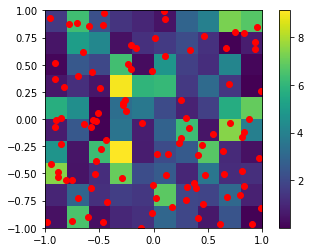

In [8]:
plt.show()

In [9]:
x = df['lon'][0]
y = df['lat'][0]

x,y

(-0.70283933729608883, 0.88683698745087747)

In [10]:
z[0,0]

1.5281865691006056

In [11]:
sim_Y_scale = np.random.uniform(-1.0,1.0)
theta = np.random.uniform(0,1)
sim_Y_cov_effect = np.random.uniform(-1.0,1.0)
sim_Y_het_effect = "NA"
sim_Y_e = "NA"
spill_mag = "NA"

In [12]:
df['id'] = range(1,n+1,1)
df['theta'] = theta

In [29]:
df["e_vec"] = list(np.random.uniform(min(df["z"]), max(df["z"]), n))
# df["probability"] = (df["z"] + abs(min(df["z"])))/(max(df["z"]) + abs(min(df["z"])))

# random select treatment and control
treatment = df.sample(n=(n/2)) #, weights=df["probability"]
df['treatment_random'] = df.apply(lambda x: 1 if int(x['id']) in list(treatment['id']) else 0, axis=1)
df['Y_random'] = theta * df["treatment_random"] + sim_Y_cov_effect * df["z"]
#df['Y_random'] = df['Y_random'] + np.random.uniform(min(list(df['Y_random'])), max(list(df['Y_random'])))


In [37]:
# y was assigned based on z
df["probability"] = (df["z"] + abs(min(df["z"])))/(max(df["z"]) + abs(min(df["z"])))   #
treatment_onz = df.sample(n=(n/2), weights=df["probability"])
df['treatment_onz'] = df.apply(lambda x: 1 if int(x['id']) in list(treatment_onz['id']) else 0, axis=1)
df['Y_onz'] = theta * df["treatment_onz"] + sim_Y_cov_effect * df["z"]
#df['Y_onz'] = df['Y_onz'] + np.random.uniform(min(list(df['Y_onz'])), max(list(df['Y_onz'])))


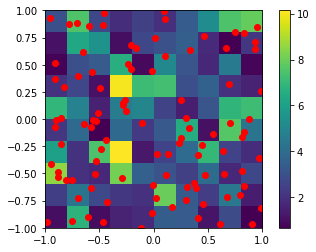

In [39]:
# visualize the first 100 Ys
z = np.array(df['Y'])
N = int(len(z)**.5)
z = z.reshape(N,N)

plt.imshow(z, extent=(-1.0, 1.0, -1.0, 1.0))

x = df['lon']
y = df['lat']

plt.plot(x, y,'ro')
plt.colorbar()

plt.show()

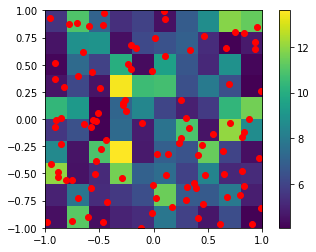

In [40]:
# visualize the first 100 Ys
z = np.array(df['Y_onz'])
N = int(len(z)**.5)
z = z.reshape(N,N)

plt.imshow(z, extent=(-1.0, 1.0, -1.0, 1.0))

x = df['lon']
y = df['lat']

plt.plot(x, y,'ro')
plt.colorbar()

plt.show()

In [41]:
df.to_csv("/Users/miranda/Documents/AidData/github/Simulation_geoMatch/test.csv", encoding='utf-8', sep=',')

In [42]:
import pysal
import geopandas as gpd
from shapely.geometry import Point
#coordinates = df[['lon','lat']]
#coor_matrix = coordinates.as_matrix()
geometry = [Point(coord) for coord in zip(df['lon'],df['lat'])]
gdf = gpd.GeoDataFrame(df,geometry=geometry)
kw = pysal.weights.KNN.from_dataframe(df)
x = np.array(df['z'])
mix = pysal.Moran(x, kw, two_tailed=False)

print "---------Moran's I for independent variable"
print "Moran's I is", "%.3f"%mix.I
print "Expected Moran's I is", mix.EI
print "p value is","%.5f"%mix.p_norm


Moran's I is 0.057
Expected Moran's I is -0.010101010101
p value is 0.22939


In [43]:
y_random = np.array(df['Y_random'])
miy_random = pysal.Moran(y_random, kw, two_tailed=False)

y_onz = np.array(df['Y_onz'])
mi_onz = pysal.Moran(y_onz, kw, two_tailed=False)

print "---------Moran's I for dependent variable, random assign treatment"
print "Moran's I is", "%.3f"%miy_random.I
print "Expected Moran's I is", miy_random.EI
print "p value is","%.5f"%miy_random.p_norm

print "---------Moran's I for dependent variable, random assign treatment"
print "Moran's I is", "%.3f"%mi_onz.I
print "Expected Moran's I is", mi_onz.EI
print "p value is","%.5f"%mi_onz.p_norm

---------Moran's I for dependent variable, random assign treatment
Moran's I is 0.053
Expected Moran's I is -0.010101010101
p value is 0.24433
---------Moran's I for dependent variable, random assign treatment
Moran's I is 0.099
Expected Moran's I is -0.010101010101
p value is 0.11416


In [46]:
rest.optimality

0.0